# Import Libraries

In [29]:
import numpy as np                          # handle array
import pandas as pd                         # to load datasets
import seaborn as sns                       # to create plots or figures

from statsmodels.formula.api import ols     # to create linear models
import statsmodels.api as sm                # also to create linear models

from matplotlib.pyplot import subplots      # to create subplots
import matplotlib.pyplot as plt             # to create plots

from sklearn.metrics import mean_squared_error

# Dataset

In [30]:
# read dataset
df_boston = pd.read_csv('Boston.csv')
df_boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [31]:
# remove unwanted features or columns
df_boston = df_boston.drop(['Unnamed: 0'], axis=1)
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [32]:
def analyze_column(data, column, target_column):
  """Analyze a single column against the target."""
  # Scatter plot
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=data, x=column, y=target_column)
  plt.title(f'{column} vs {target_column}')
  plt.xlabel(column)
  plt.ylabel(target_column)
  plt.show()

  # Correlation
  correlation = data[[column, target_column]].corr().iloc[0, 1]
  print(f'Correlation between {column} and {target_column}: {correlation}')

def analyze_all_columns(data, target_column):
  """Analyze all columns against the target."""
  feature_columns = [col for col in data.columns if col != target_column]
  for column in feature_columns:
    analyze_column(data, column, target_column)


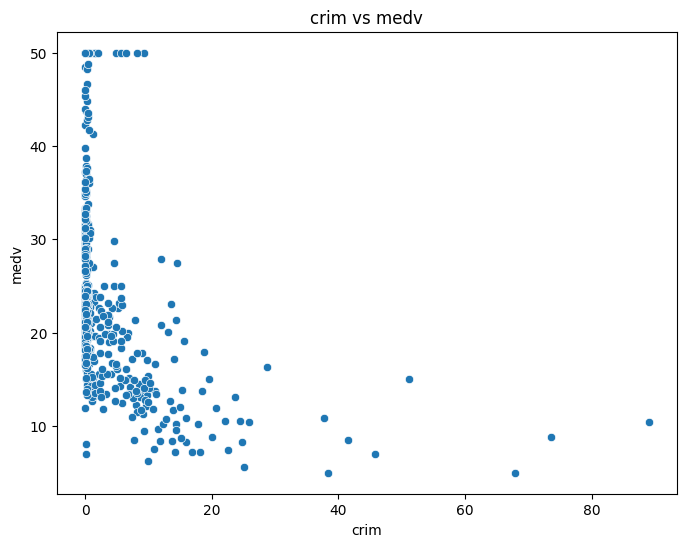

Correlation between crim and medv: -0.38830460858681154


In [33]:
# relation between crime and medv
analyze_column(df_boston, 'crim', 'medv')

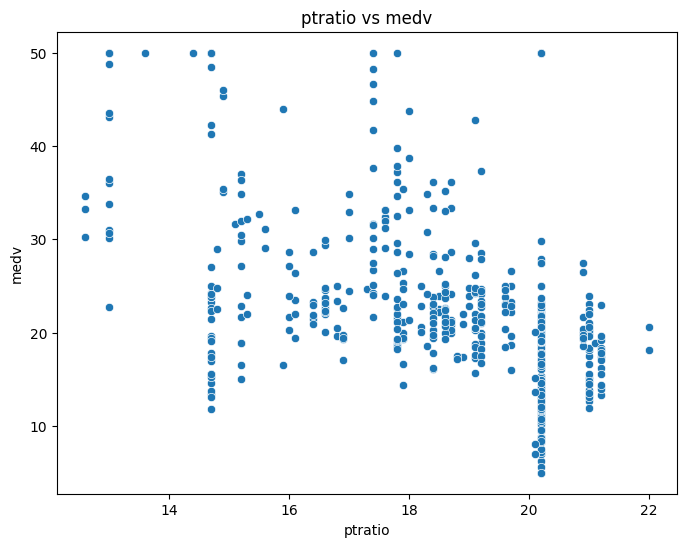

Correlation between ptratio and medv: -0.5077866855375623


In [34]:
analyze_column(df_boston, 'ptratio', 'medv')

# Analyze all the columns against "medv"

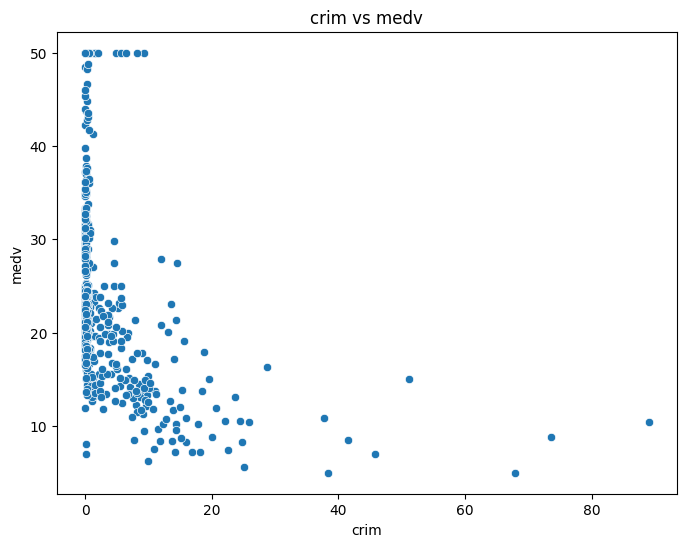

Correlation between crim and medv: -0.38830460858681154


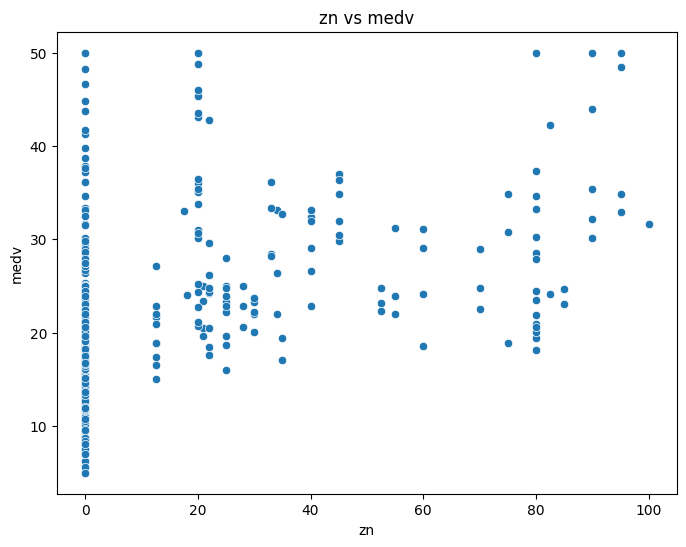

Correlation between zn and medv: 0.3604453424505433


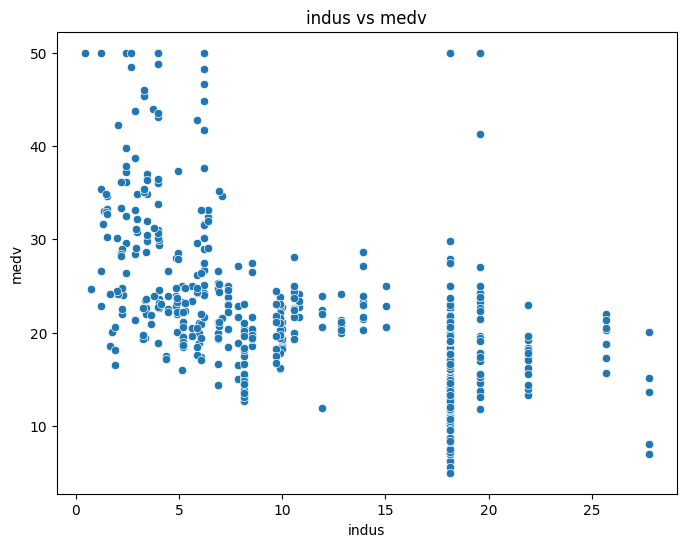

Correlation between indus and medv: -0.48372516002837274


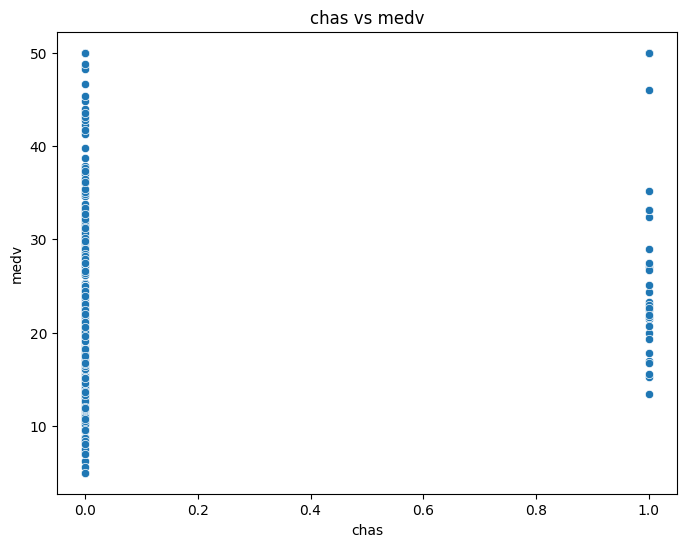

Correlation between chas and medv: 0.17526017719029868


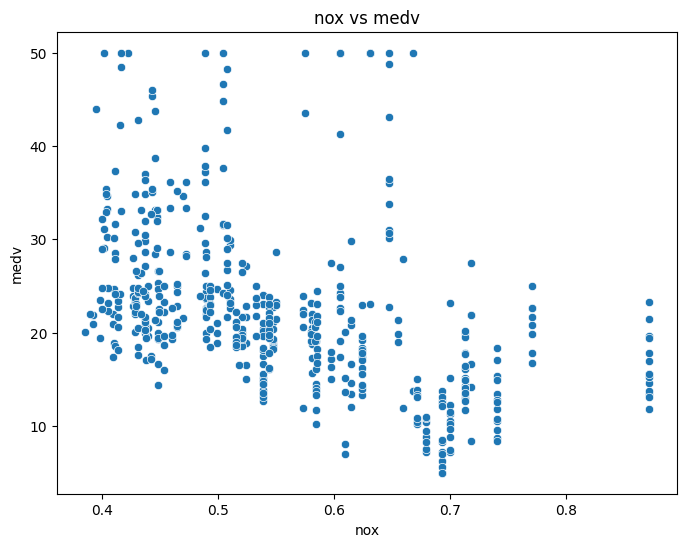

Correlation between nox and medv: -0.42732077237328203


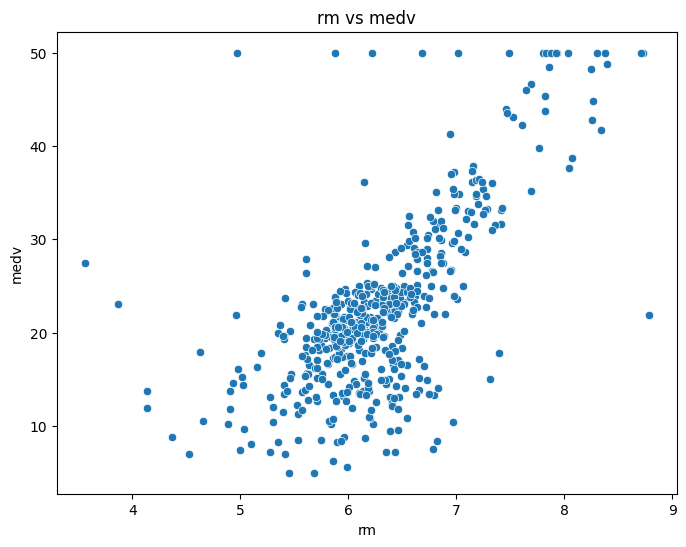

Correlation between rm and medv: 0.6953599470715401


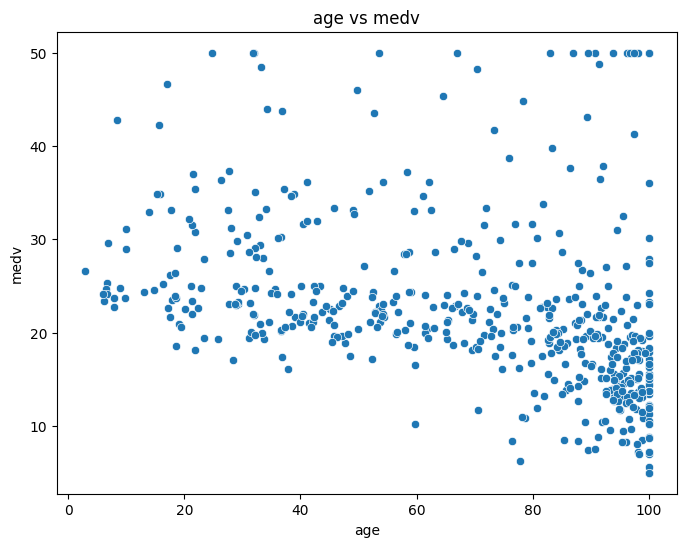

Correlation between age and medv: -0.3769545650045961


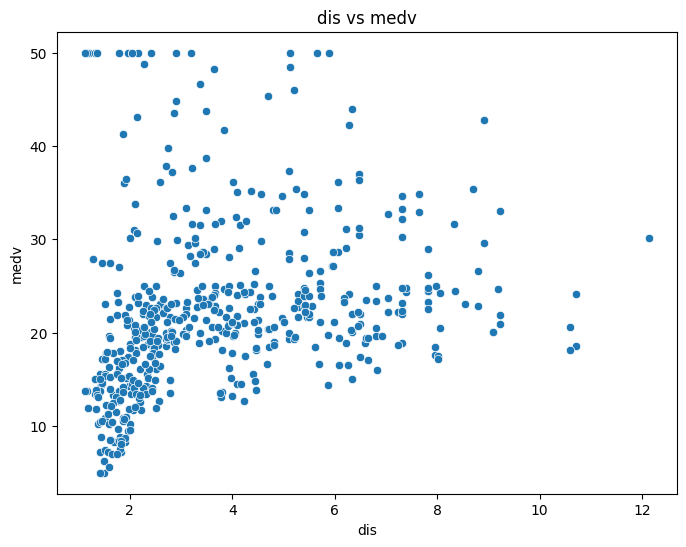

Correlation between dis and medv: 0.249928734085904


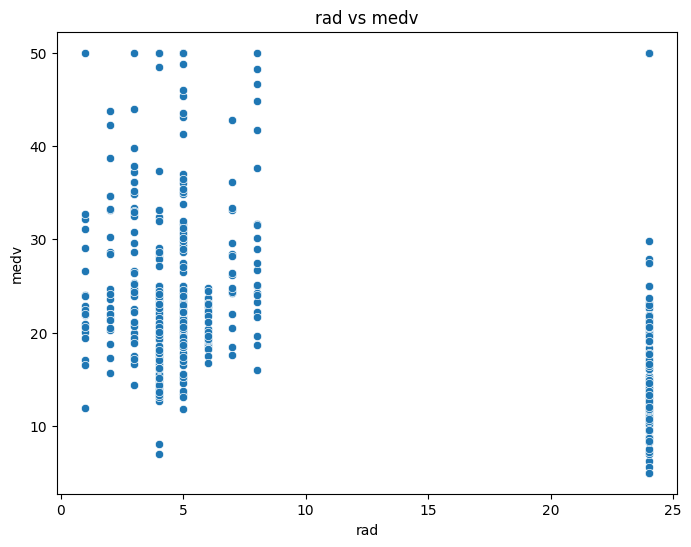

Correlation between rad and medv: -0.38162623063977735


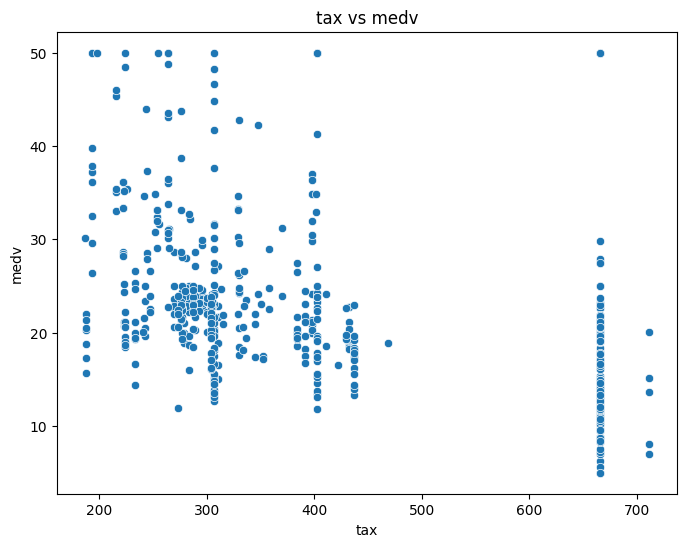

Correlation between tax and medv: -0.4685359335677667


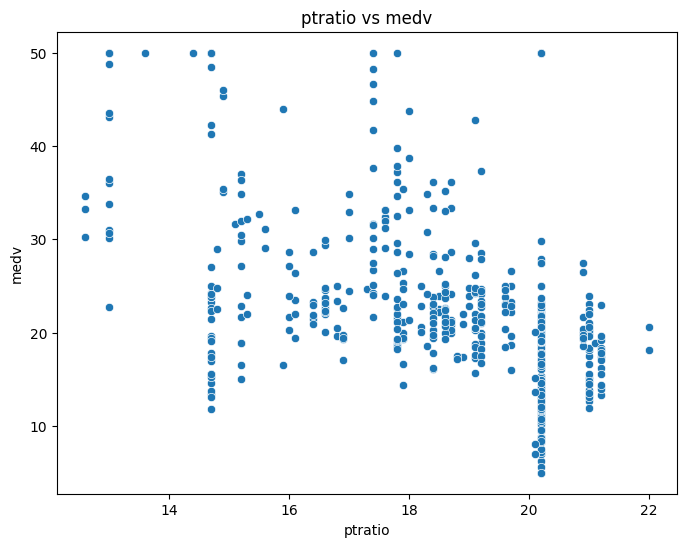

Correlation between ptratio and medv: -0.5077866855375623


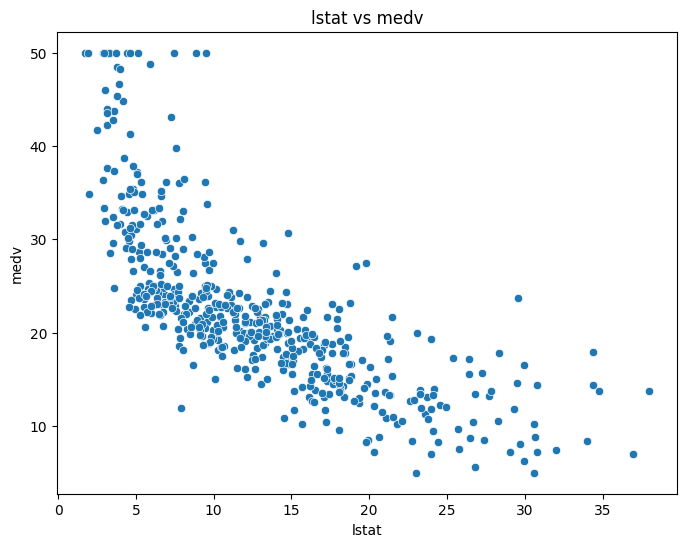

Correlation between lstat and medv: -0.7376627261740145


In [35]:
analyze_all_columns(df_boston, 'medv')

# Simple Linear Regression

In [36]:

def residuals_plot(model):
  ax = subplots(figsize=(8,8))[1]
  ax.scatter(model.fittedvalues, model.resid)
  ax.set_xlabel('Fitted value')
  ax.set_ylabel('Residual')
  ax.axhline(0, c='k', ls='--');


In [37]:
simple_lr = ols('medv ~ lstat', data=df_boston)   # create the model
result = simple_lr.fit()                          # fit the model
print(result.summary())                           # print the model results summary

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        23:15:20   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [38]:
y_hat = result.predict(df_boston['lstat'])
mse = mean_squared_error(df_boston['medv'], y_hat)
print(f'MSE: {mse}')

MSE: 38.48296722989414


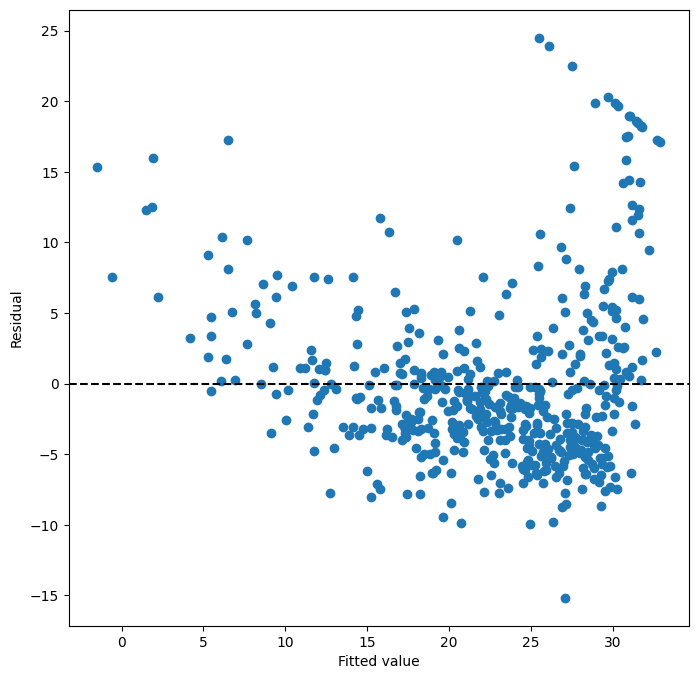

In [39]:
# plot the residuals

residuals_plot(result)

In [40]:
# train with rm as the predictor
simple_lr = ols('medv ~ rm', data=df_boston)      # create the model
result = simple_lr.fit()                          # fit the model
print(result.summary())                           # print the model results summary

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           2.49e-74
Time:                        23:15:21   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [41]:
# predict
y_hat = result.predict(df_boston['rm'])
mse = mean_squared_error(df_boston['medv'], y_hat)
print(f'MSE: {mse}')

MSE: 43.60055177116956


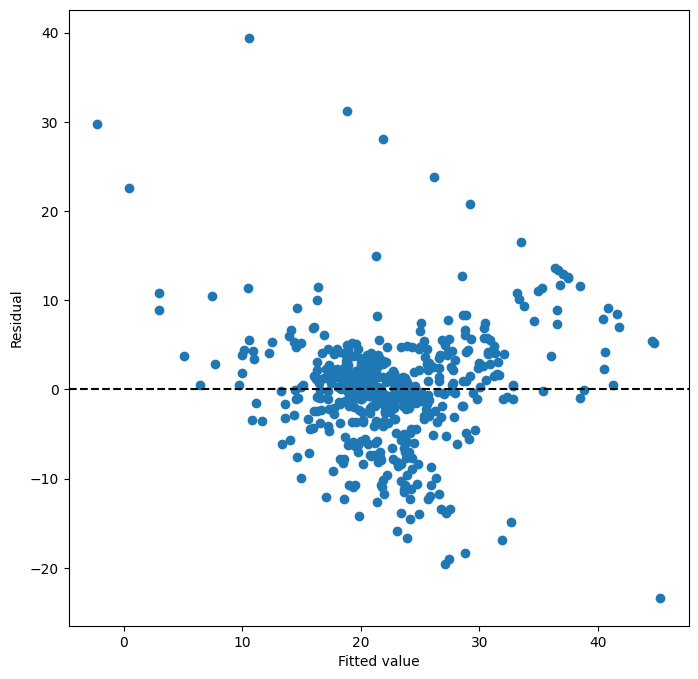

In [42]:
# show the residual plots
residuals_plot(result)

# Something that I tried in class

In [43]:
# train with both rm and Lstat as the predictors
simple_lr = ols('medv ~ rm + lstat + ptratio + tax + rad + age + dis + nox + indus + zn + crim', data=df_boston)      # create the model
result = simple_lr.fit()                          # fit the model
print(result.summary())                           # print the model results summary

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     120.5
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          3.71e-132
Time:                        23:15:21   Log-Likelihood:                -1510.3
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     494   BIC:                             3095.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.3279      4.979      8.501      0.0

In [44]:
# predict
y_hat = result.predict(df_boston)
mse = mean_squared_error(df_boston['medv'], y_hat)
print(f'MSE: {mse}')

MSE: 22.914484190616346


# Multiple Linear Regression

In [45]:
multiple_lr = ols('medv~lstat+rm', data=df_boston).fit()
print(multiple_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          7.01e-112
Time:                        23:15:21   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.6

In [46]:
y_hat = multiple_lr.predict(df_boston[['lstat', 'rm']])
mse = mean_squared_error(df_boston['medv'], y_hat)
print(f'MSE: {mse}')

MSE: 30.51246877729947


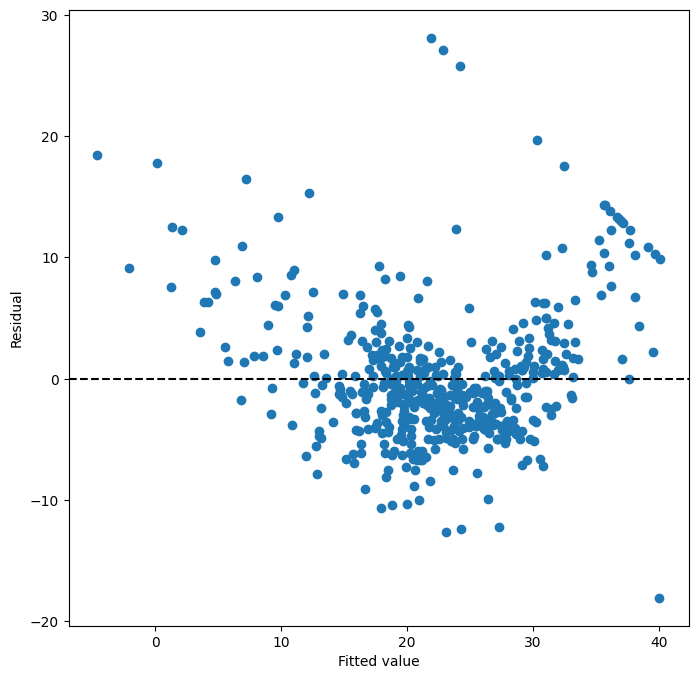

In [47]:
residuals_plot(multiple_lr)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          2.23e-133
Time:                        23:15:22   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

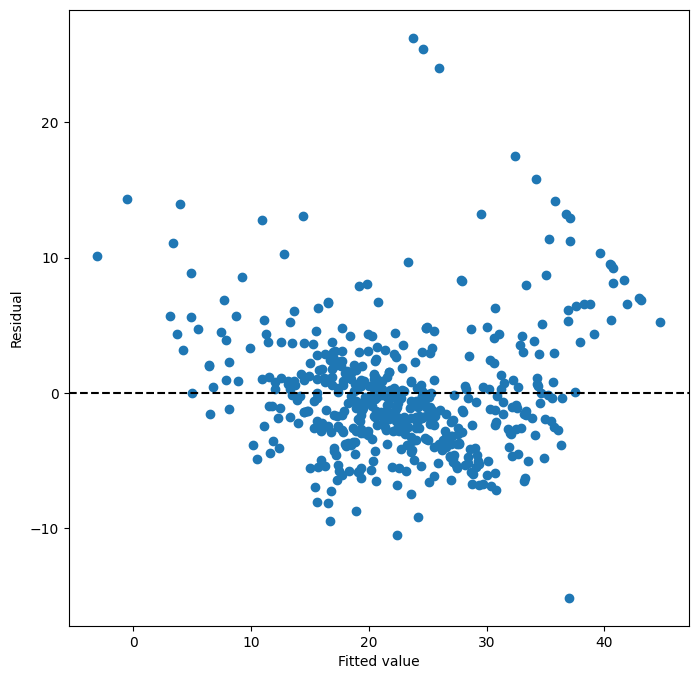

In [48]:
y = df_boston['medv']                 #capture the y
X = df_boston.drop('medv', axis=1)    #drop medv to capture all features
X = sm.add_constant(X)                #add the constant term
#print(X.head())
all_features_model_result = sm.OLS(y, X).fit()  # create and train the model
print(all_features_model_result.summary())      # print the model summary
print(f'MSE: {mean_squared_error(y, all_features_model_result.predict(X))}')     #print summary and also predict
residuals_plot(all_features_model_result)   #plot the residuals

# Interactions

In [49]:
interactions_lr = ols('medv~ 1 + lstat*rm', data=df_boston).fit()
print(interactions_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          1.75e-146
Time:                        23:15:22   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.1245      3.342     -8.713      0.0

In [50]:
interactions_lr = ols('medv~ 1 + age*rm', data=df_boston).fit()
print(interactions_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     204.7
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.04e-86
Time:                        23:15:22   Log-Likelihood:                -1638.1
No. Observations:                 506   AIC:                             3284.
Df Residuals:                     502   BIC:                             3301.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -59.5929      7.787     -7.653      0.0

# Non - Linear Transformations

In [61]:
non_linear = ols('medv~ 1 + lstat', data=df_boston).fit()
print(non_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        23:29:33   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

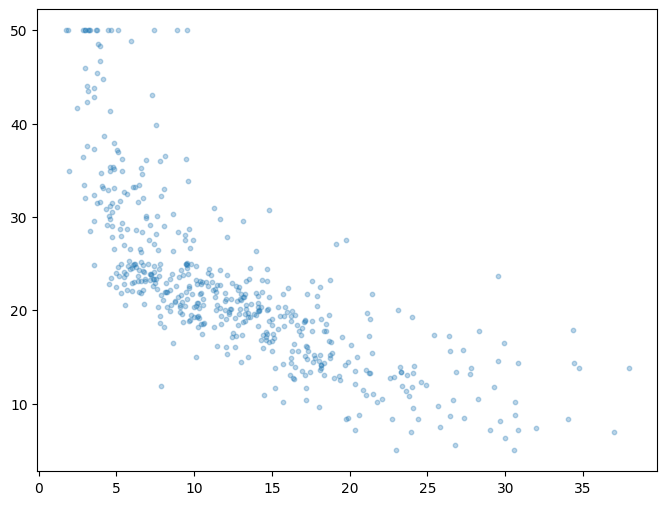

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(df_boston.lstat, df_boston.medv, s=10, alpha=0.3)

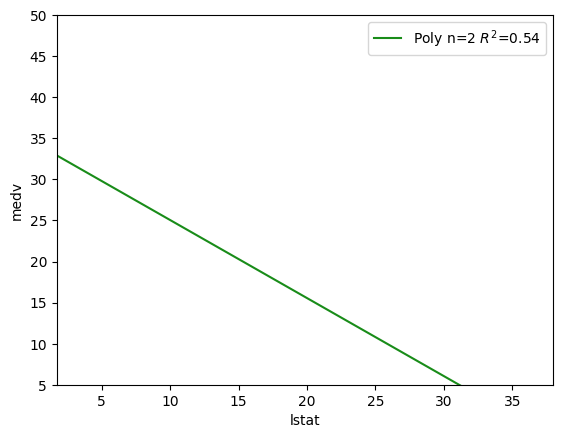

In [65]:
plt.xlabel('lstat')
plt.ylabel('medv')
#plt.xticks(df_boston.lstat)
plt.xlim(min(df_boston.lstat), max(df_boston.lstat))
plt.ylim(min(df_boston.medv), max(df_boston.medv))

# points linearlyd space on lstats
x = pd.DataFrame({'lstat': np.linspace(df_boston.lstat.min(), df_boston.lstat.max(), 100)})
plt.plot(x, non_linear.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % non_linear.rsquared,
alpha=0.9)

plt.legend();

# My Interpretation of the Results


---


## The code explores the relationship between housing prices ('medv') and various predictors using different regression models.


###Simple Linear Regression:

*   A simple linear regression model using 'lstat' (percentage of lower status of the population) as a predictor showed a strong negative relationship.

*   As 'lstat' increases, 'medv' tends to decrease. The MSE was relatively high, indicating that this model alone doesn't fully capture the complexity of housing prices.

* Similar analysis with other predictors like 'rm' (average number of rooms per dwelling) was performed.

###Multiple Linear Regression:

*   Including both 'lstat' and 'rm' in a multiple linear regression model improved the prediction accuracy, resulting in a lower MSE.

*   The model suggests that 'rm' has a positive relationship with 'medv' while 'lstat' has a negative relationship.


###Interactions:
* Exploring interactions between predictors, such as 'lstat' and 'rm', can reveal more complex relationships. For instance, the effect of 'rm' on 'medv' might be different at different levels of 'lstat'.

###Non-linear Transformations:
* Visualizing the relationship between 'lstat' and 'medv' suggested a non-linear relationship. This indicates that transformations of predictors might be necessary to improve model fit.


##Summary

The analysis revealed that housing prices are influenced by various factors, including socioeconomic status ('lstat'), average number of rooms ('rm'), and potentially other features. Models with multiple predictors and non-linear relationships tend to be more accurate in predicting housing prices.


## Some Unique Insight

One way of using these insights would predicting the prices of the houses in the future.

But I feel that we could use this to data to build a new house in the area with **high selling price.**

